In [16]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

In [17]:
#Importing and understanding our dataset
dataset = pd.read_csv("heart.csv")
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [18]:
type(dataset) #Verifying it as a 'dataframe' object in pandas


pandas.core.frame.DataFrame

In [19]:
dataset.shape #Shape of dataset

(303, 14)

In [20]:
dataset.head(5) #Printing out a few columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
dataset.sample(5) #Printing out a few columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
#Let's understand our columns better:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [24]:
dataset["target"].unique() #Clearly, this is a classification problem, with the target variable having values '0' and '1'

array([1, 0], dtype=int64)

In [25]:
#Checking correlation between columns
print(dataset.corr()["target"].abs().sort_values(ascending=False)) #This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

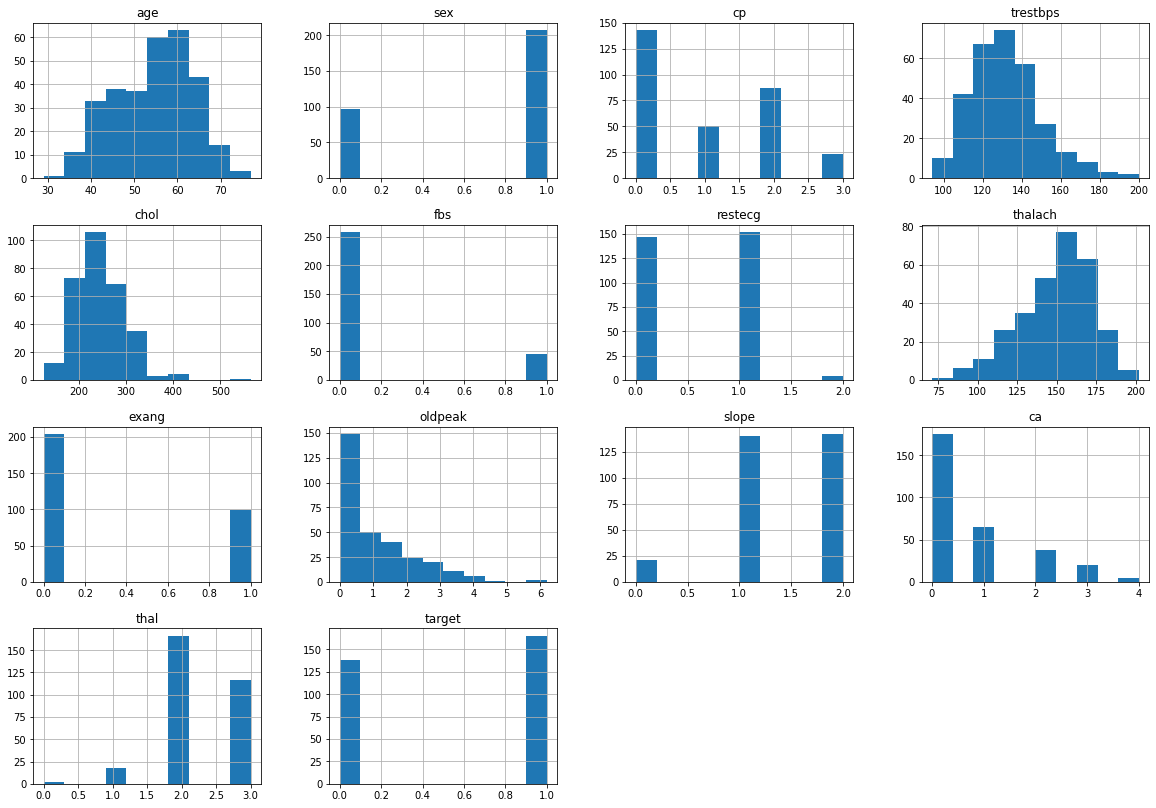

In [33]:
dataset.hist() #histogram for whole daatset

<AxesSubplot:>

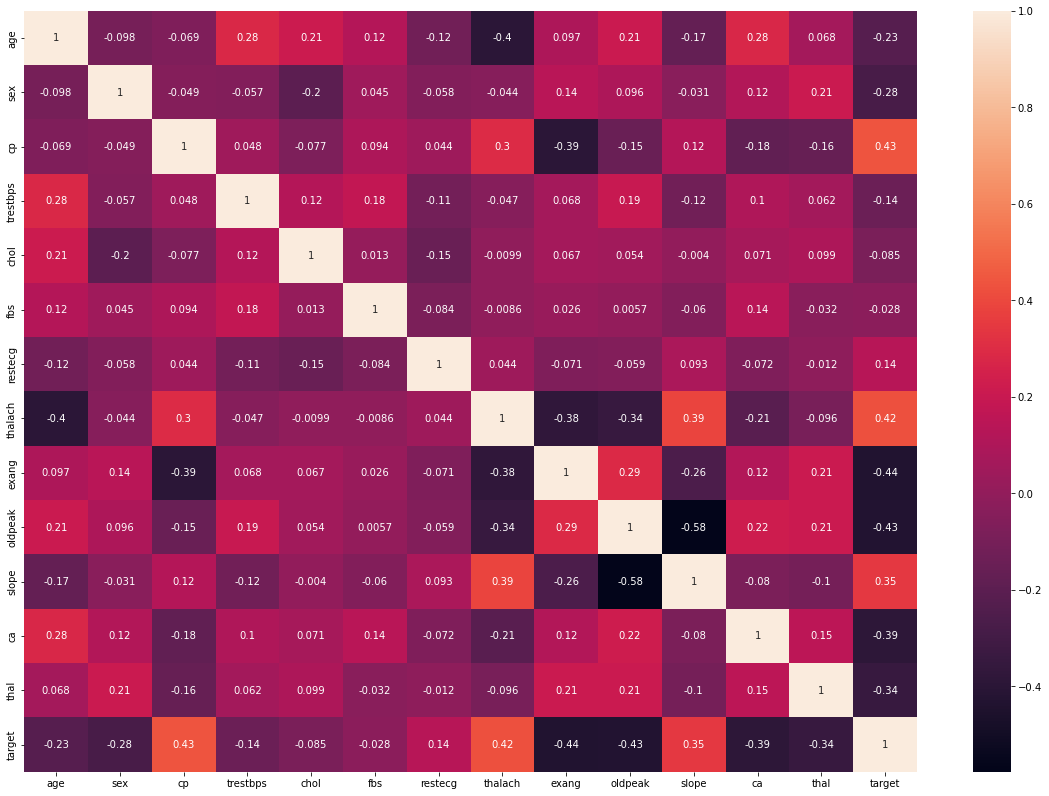

In [32]:
a=dataset.corr()
sns.heatmap(a,annot = True) 

1    165
0    138
Name: target, dtype: int64


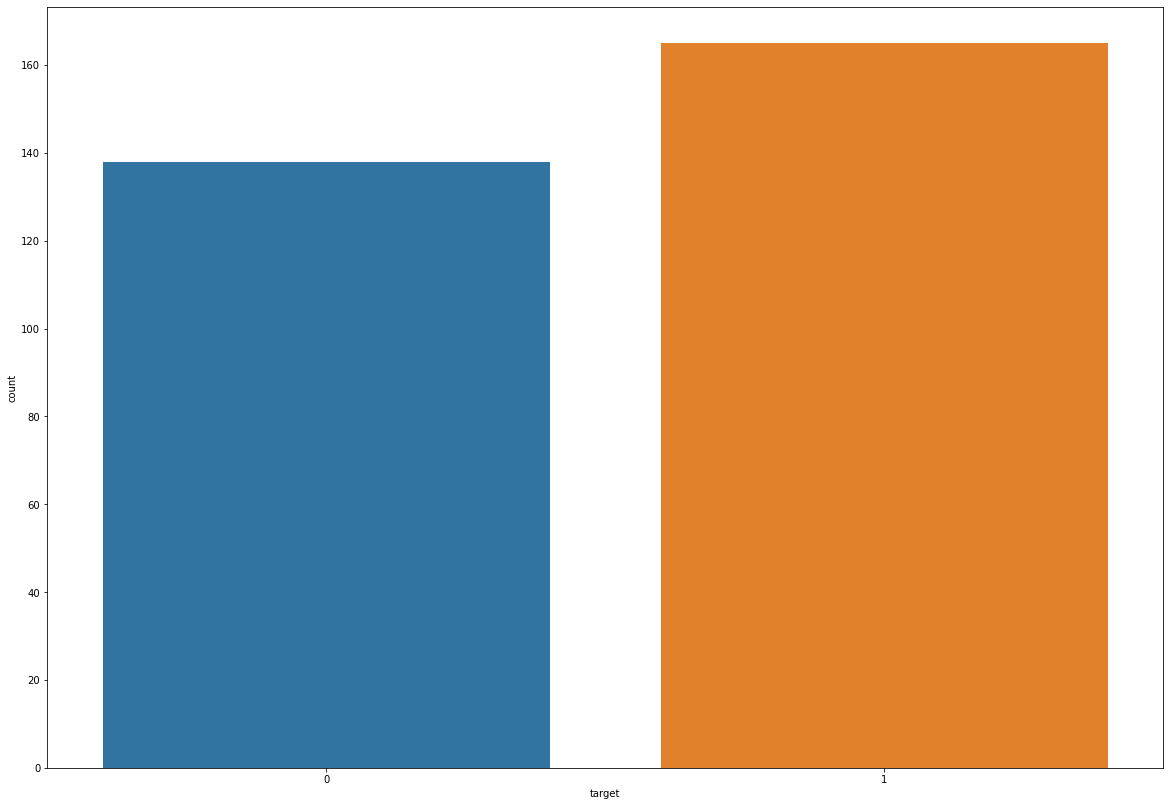

In [37]:
#Exploratory Data Analysis (EDA)
#First, analysing the target variable:

y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

In [53]:
print("Percentage of patience not affected with heart attack: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience affected with heart attack: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience not affected with heart attack: 45.54
Percentage of patience affected with heart attack: 54.46


In [39]:
#We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

#Analysing the 'Sex' feature
dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

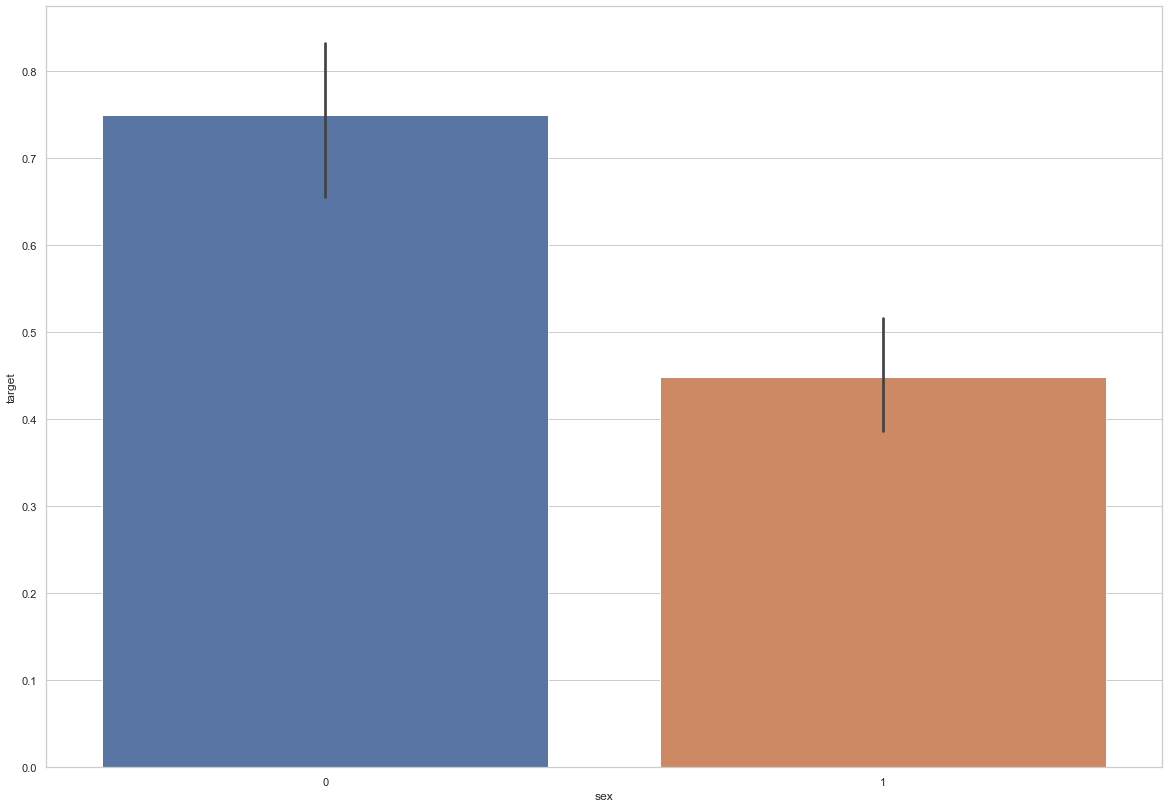

In [54]:
#We notice, that as expected, the 'sex' feature has 2 unique features

sns.barplot(dataset["sex"],y)
#We notice, that females are more likely to have heart problems than males

In [55]:
#Analysing the 'Chest Pain Type' feature
dataset["cp"].unique()
#As expected, the CP feature has values from 0 to 3

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

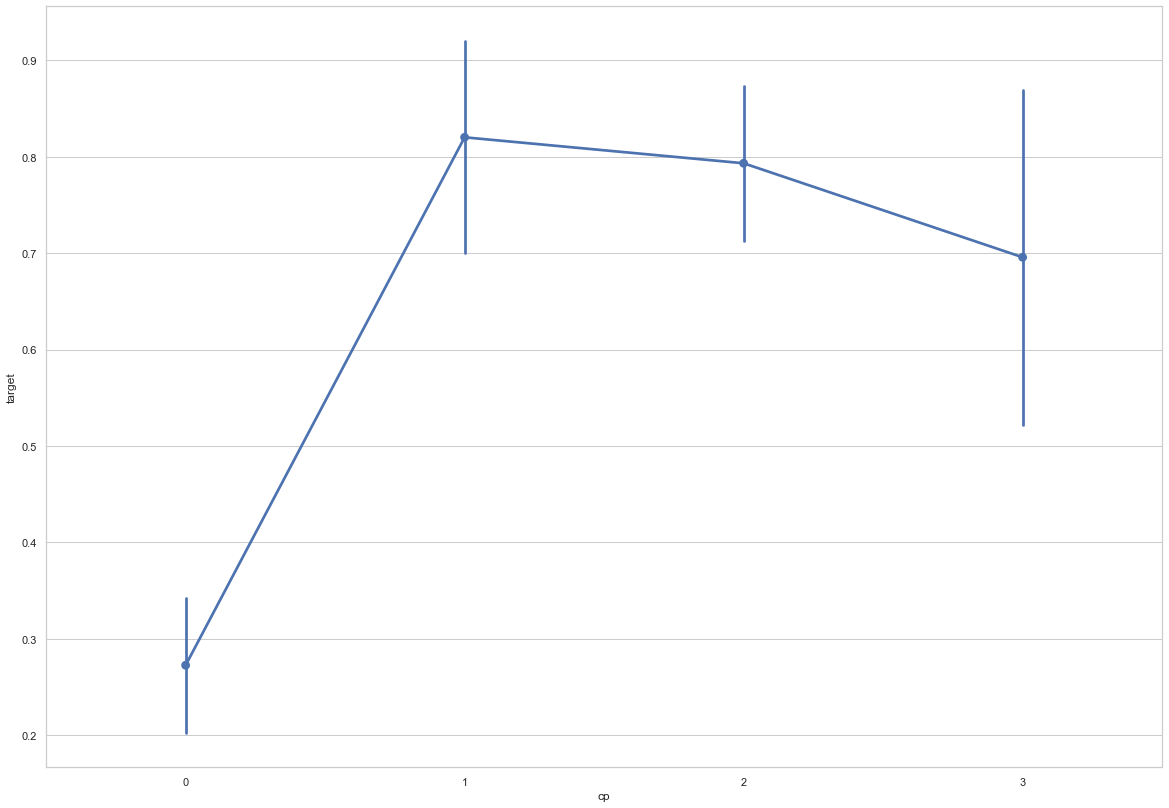

In [70]:
sns.pointplot(dataset["cp"],y)
#We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [71]:
#Analysing the FBS feature
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [72]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

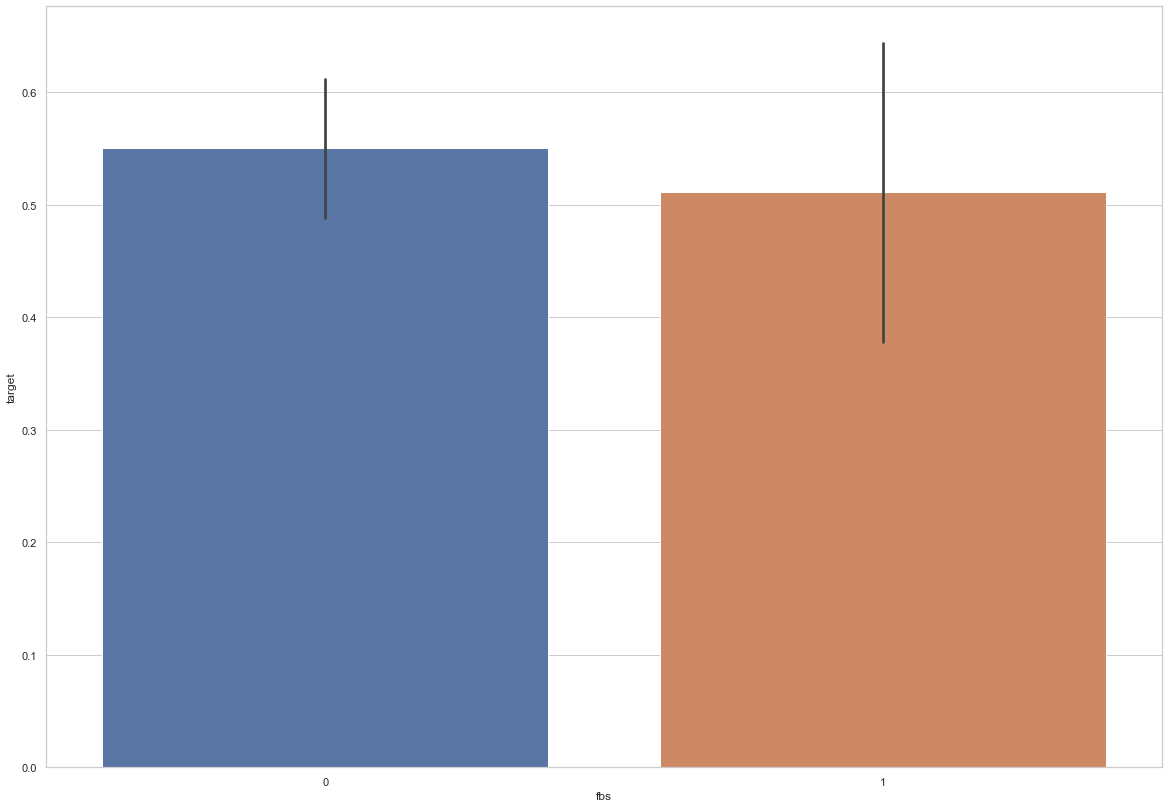

In [76]:
sns.barplot(dataset["fbs"],y)
#Nothing extraordinary here

In [77]:
#Analysing the restecg feature

dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

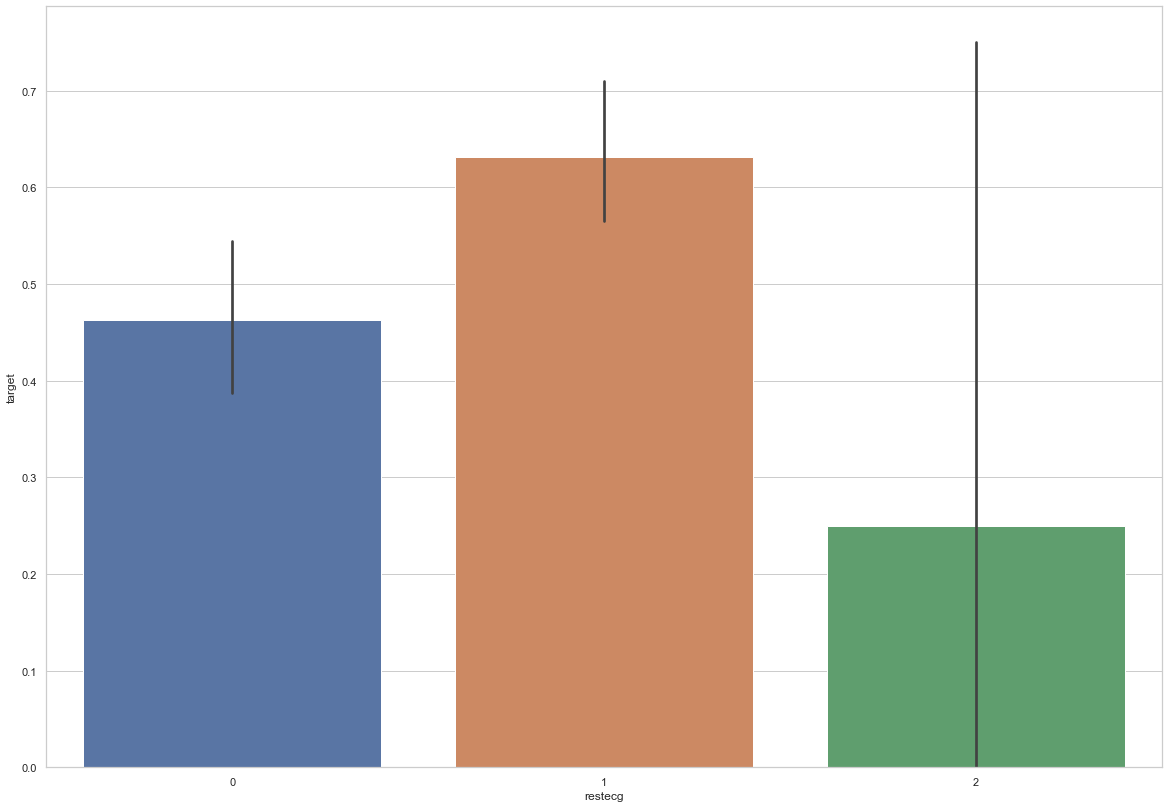

In [87]:
sns.barplot(dataset["restecg"],y)
#We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [88]:
#Analysing the 'exang' feature
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

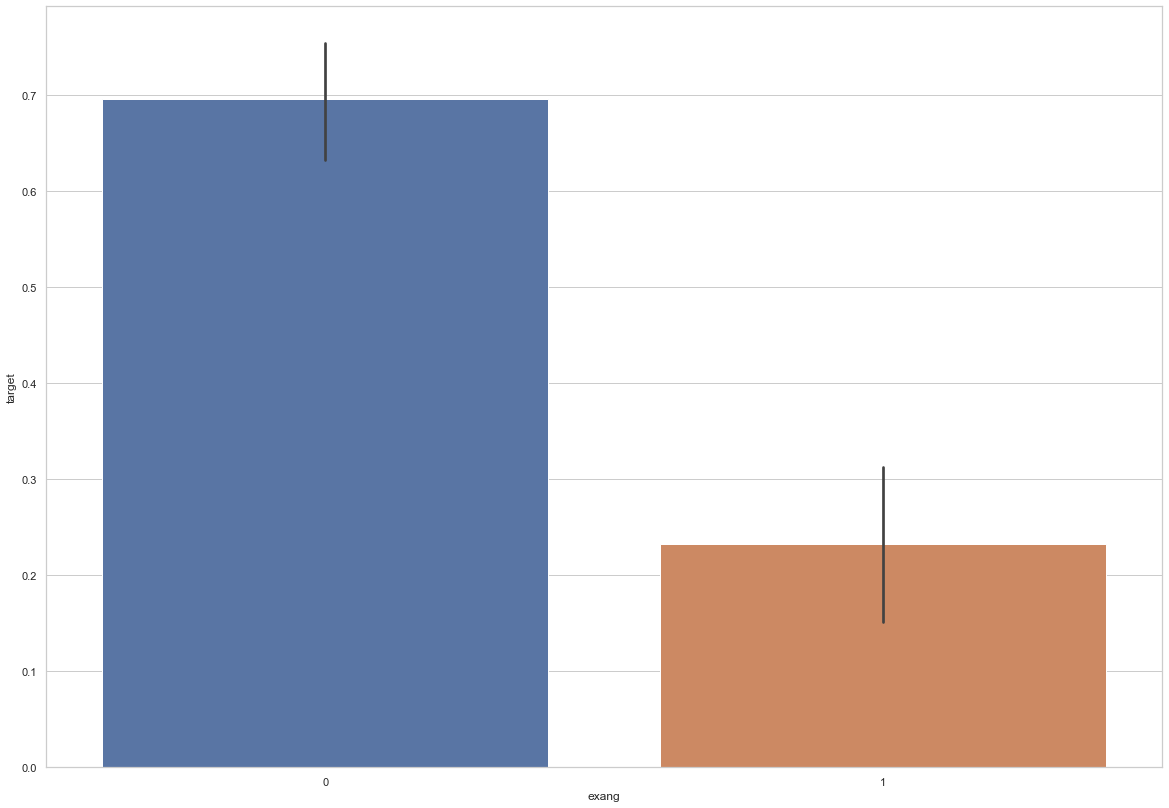

In [90]:
sns.barplot(dataset["exang"],y)
#People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [91]:
#Analysing the Slope feature
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

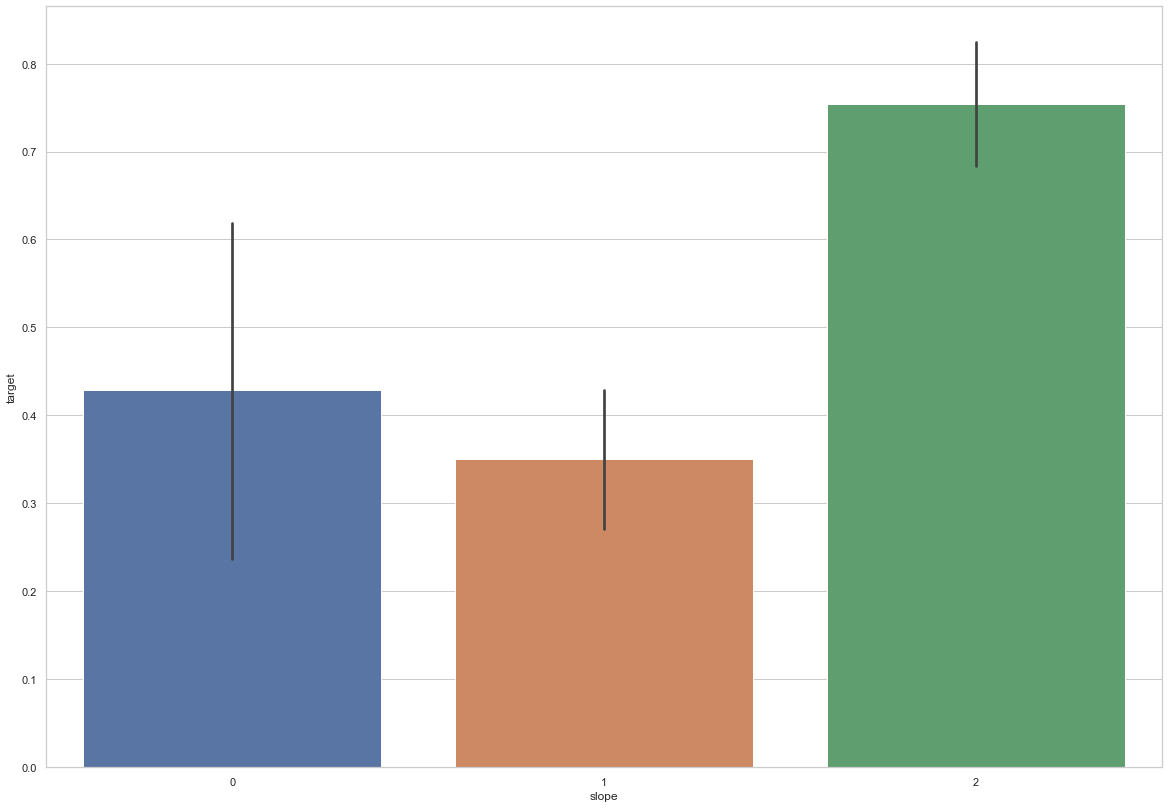

In [92]:
sns.barplot(dataset["slope"],y)
#We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

In [93]:
#Analysing the 'ca' feature
#number of major vessels (0-3) colored by flourosopy
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

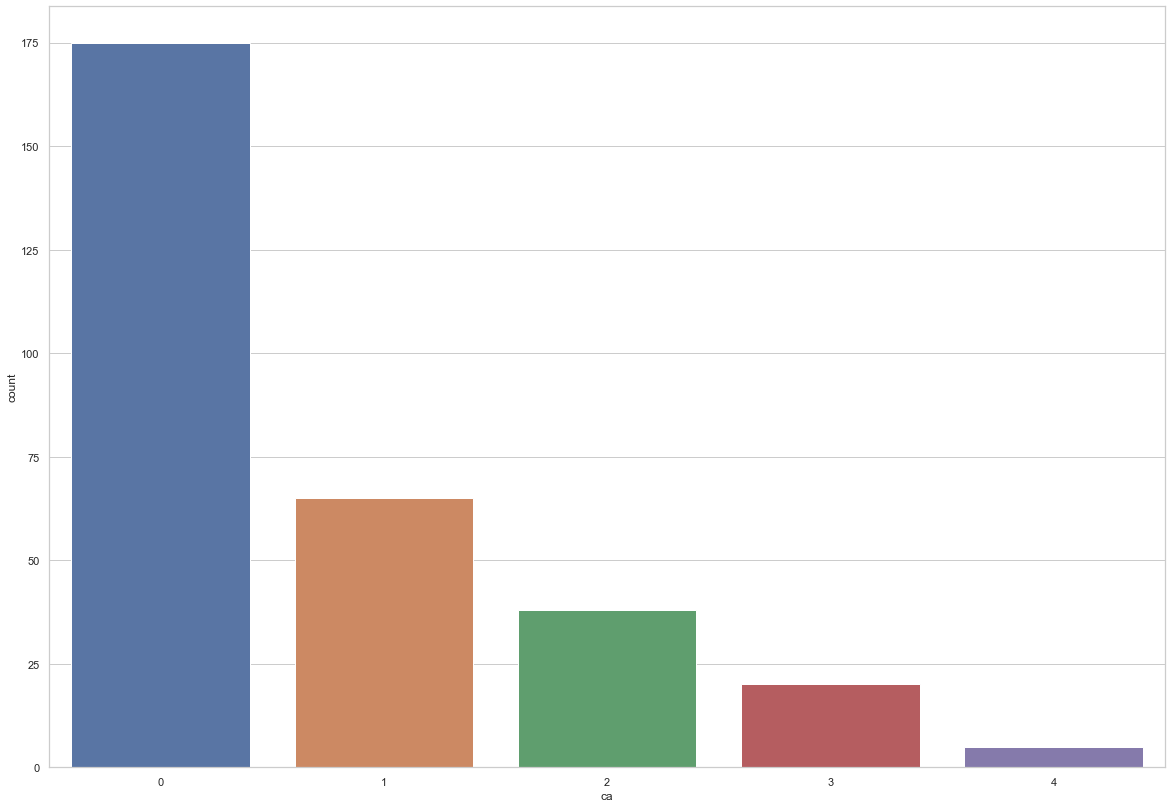

In [100]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

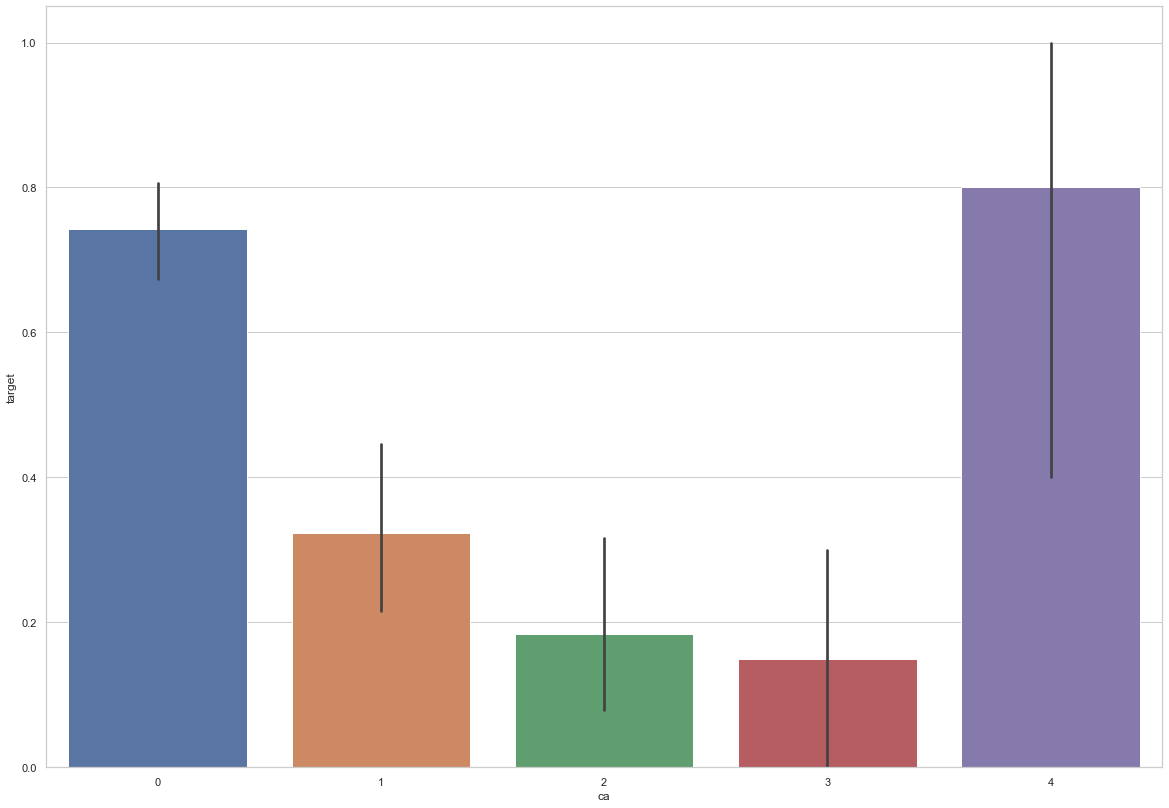

In [103]:
sns.barplot(dataset["ca"],y)
#ca=4 has astonishingly large number of heart patients

In [104]:
# Analysing the 'thal' feature
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

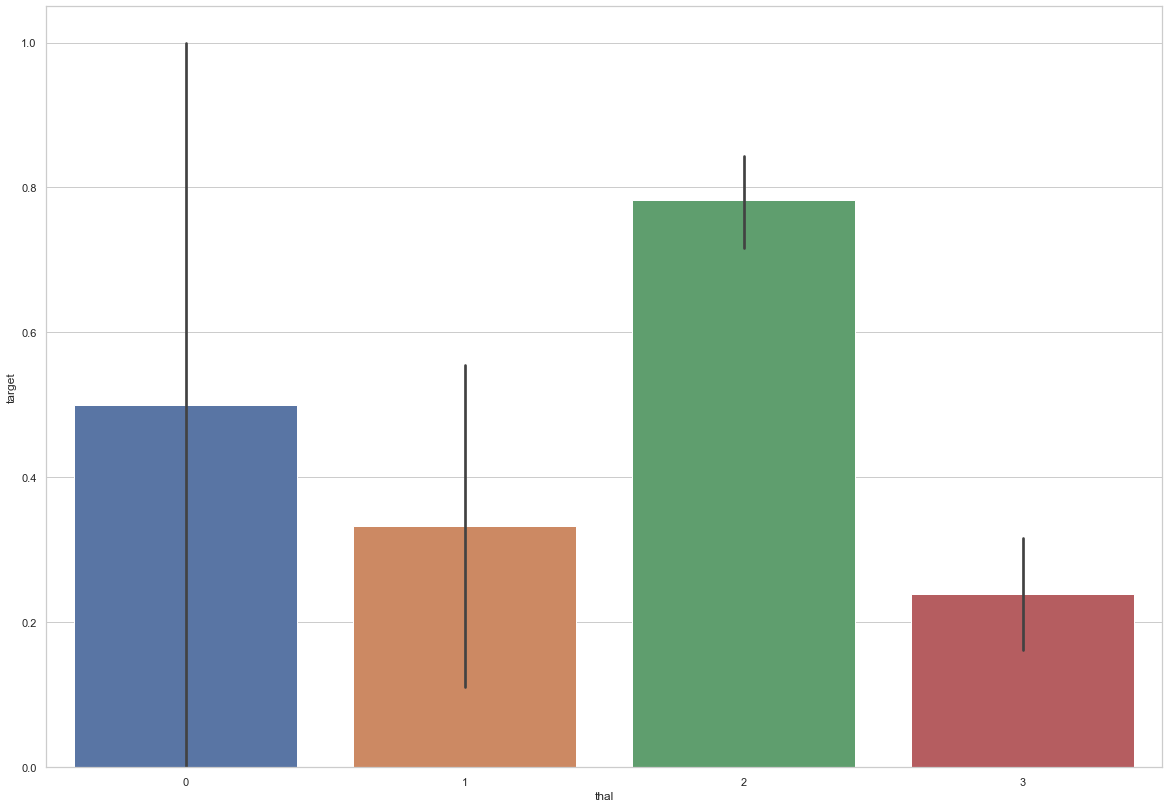

In [105]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

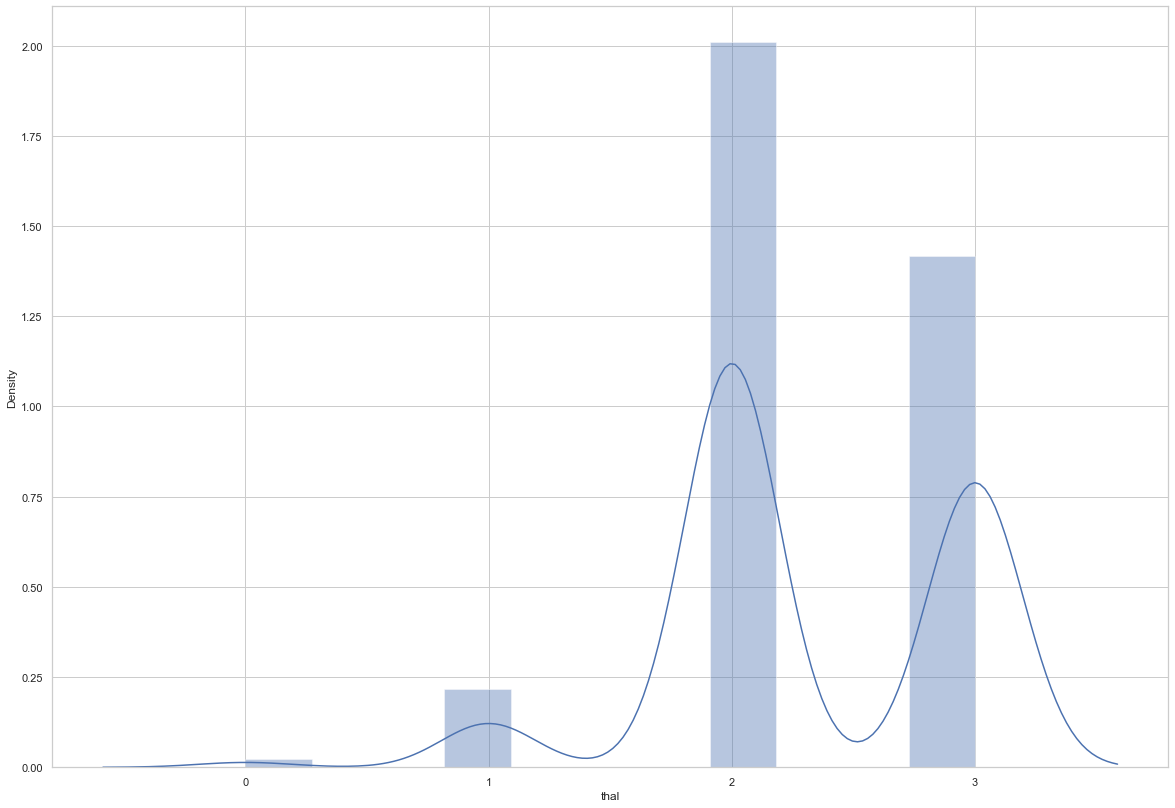

In [106]:
sns.distplot(dataset["thal"])

In [107]:
#Train Test split
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [108]:
X_train.shape

(242, 13)

In [109]:
X_test.shape

(61, 13)

In [110]:
Y_train.shape

(242,)

In [111]:
Y_test.shape

(61,)

In [112]:
#Model Fitting
from sklearn.metrics import accuracy_score

In [113]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [114]:
Y_pred_lr.shape

(61,)

In [115]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [116]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [117]:
Y_pred_nb.shape


(61,)

In [118]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [120]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [121]:
Y_pred_svm.shape

(61,)

In [122]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [123]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [124]:
Y_pred_knn.shape

(61,)

In [125]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [133]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

81.97
11


In [131]:
print(Y_pred_dt.shape)

(61,)


In [132]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [134]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [135]:
Y_pred_rf.shape

(61,)

In [136]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [138]:
#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [140]:
Y_pred_xgb.shape

(61,)

In [141]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [142]:
#Output final score
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %


[Text(0, 0, '85.25'),
 Text(0, 0, '85.25'),
 Text(0, 0, '81.97'),
 Text(0, 0, '67.21'),
 Text(0, 0, '81.97'),
 Text(0, 0, '90.16'),
 Text(0, 0, '78.69')]

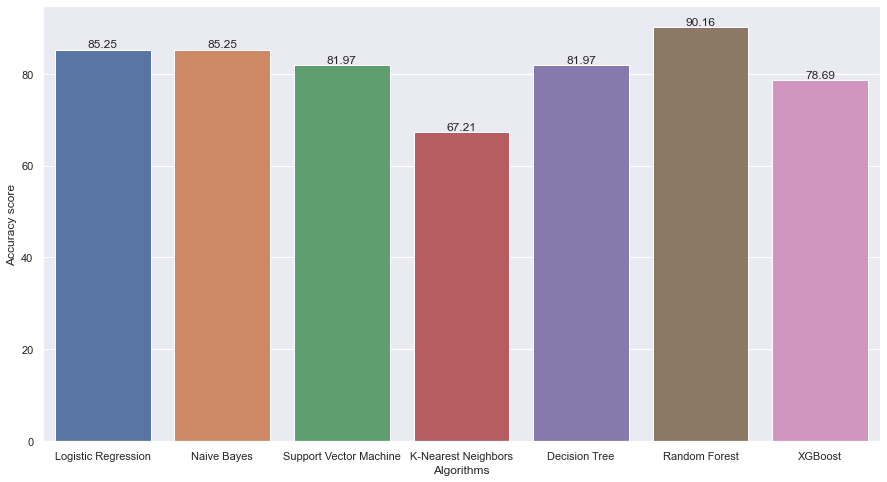

In [175]:
sns.set(rc={'figure.figsize':(15,8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

ax=sns.barplot(algorithms,scores)
ax.bar_label(ax.containers[0])
#random forest has good result as compare to other algorithms

In [174]:
#prediction using Random forest because it has high accuracy score
age=int(input("Enter the age of the patient:"))
sex=int(input("Enter the sex:Male-1,Female-0:"))
cp=int(input("Enter the value of cp:"))
trestbps=int(input("Enter the value of trestbps:"))
chol=int(input("Enter the value of chol:"))
fbs=int(input("Enter the value of fbs:"))
restecg=int(input("Enter the value of restecg:"))
thalach=int(input("Enter the value of thalach:"))
exang=int(input("Enter the value of exang:"))
oldpeak=float(input("Enter the value of oldpeak:"))
slope=int(input("Enter the value of slope:"))
ca=int(input("Enter the value of ca:"))
thal=int(input("Enter the value of thal:"))

y=rf.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
print(y)

Enter the age of the patient:63
Enter the sex:Male-1,Female-0:0
Enter the value of cp:4
Enter the value of trestbps:150
Enter the value of chol:355
Enter the value of fbs:1
Enter the value of restecg:0
Enter the value of thalach:90
Enter the value of exang:0
Enter the value of oldpeak:1
Enter the value of slope:2
Enter the value of ca:0
Enter the value of thal:3
[1]
